<a href="https://colab.research.google.com/github/KalyanMarella/study_task/blob/main/EV_Market_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import nltk
import matplotlib.pyplot as plt
from nltk.sentiment import SentimentIntensityAnalyzer
sns. set_style("whitegrid")

In [5]:
buffer=pd.read_excel("/content/smev_data.xlsx",sheet_name=None)
buffer.keys()

dict_keys(['EV 2W FY 19-20', 'EV 2W FY 20-21', 'EV 2W FY 21-22', 'EV 2W FY 22-23', 'EV Market', 'Electric Bus Sales', 'Electric 4-Wheeler Sales', 'Electric 3-Wheeler Sales', 'Electric 2-Wheeler Sales', 'EV Industries'])

In [6]:
df_industries=buffer["EV Industries"].copy()
df_industries.head()

,category,financial_year,num_vehicles
0,E-2 Wheelers,2017-18,1981
1,E-2 Wheelers,2018-19,27478
2,E-2 Wheelers,2019-20,26512
3,E-2 Wheelers,2020-21,44294
4,E-2 Wheelers,2021-22,249615


<Axes: xlabel='financial_year', ylabel='num_vehicles'>

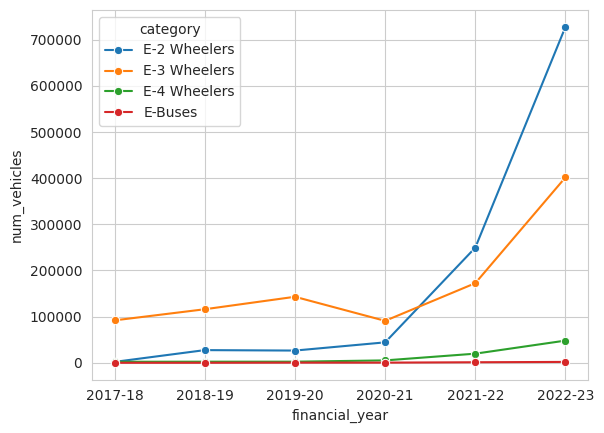

In [7]:
sns.lineplot(data=df_industries,x="financial_year",y="num_vehicles",hue="category",marker="o")

#### Observations
- 2 wheeler electrical vehicles demand is increasing year by year
- Next to 2 wheeler, 3 wheeler electric vehicle is in lead
- At last electrical buses is in constant rate irrespective of year

- Data from the government's Vahan website shows that from April 2023 to March 2024, India saw the purchase of 1,665,270 EVs, averaging 4,562 EVs sold each day, a significant jump from the 3,242 daily sales the previous year


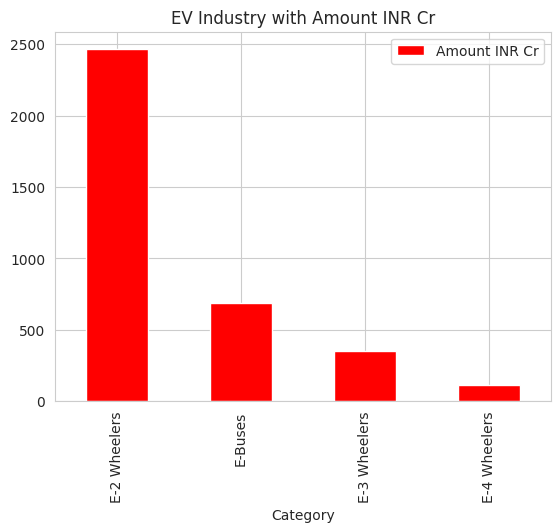

In [8]:
df_market_sales=buffer["EV Market"].copy()
df_market_sales.sort_values(by=["Amount INR Cr"],ascending=[False]).plot(x="Category",y="Amount INR Cr",kind="bar",color=["Red","Red","Red","Red"],title="EV Industry with Amount INR Cr")
plt.show()

In [9]:
cols=list(buffer.keys())[:4]
cols

['EV 2W FY 19-20', 'EV 2W FY 20-21', 'EV 2W FY 21-22', 'EV 2W FY 22-23']

### Analysis of 2 wheeler Electric Vehicles

In [10]:
df_vehicles_w2=pd.concat([buffer['EV 2W FY 19-20'],buffer['EV 2W FY 20-21'],buffer['EV 2W FY 21-22'],buffer['EV 2W FY 22-23']])

In [11]:
df_vehicles_w2.head()

,financial_year,maker,market_share,month,num_vehicles
0,2019-20,Hero Electric,0.3,Apr,1776
1,2019-20,Hero Electric,0.3,May,455
2,2019-20,Hero Electric,0.3,Jun,329
3,2019-20,Hero Electric,0.3,Jul,260
4,2019-20,Hero Electric,0.3,Aug,249


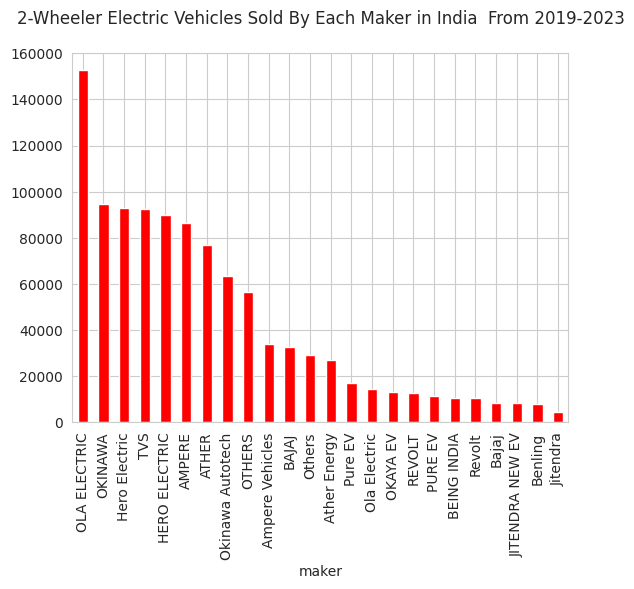

In [12]:
df_vehicles_w2.groupby("maker")["num_vehicles"].sum().sort_values(ascending=False).plot(kind="bar",
                                                        x="Makers",
                                                        y="num_vehicles",
                                                        title="2-Wheeler Electric Vehicles Sold By Each Maker in India  From 2019-2023\n",
                                                        color="red")
plt.show()

In [13]:
df_w2_vech_grp=df_vehicles_w2.groupby(["financial_year","maker"])["num_vehicles"].sum().reset_index()
df_w2_vech_grp.head()

,financial_year,maker,num_vehicles
0,2019-20,Ampere Vehicles,2518
1,2019-20,Ather Energy,2905
2,2019-20,Hero Electric,7865
3,2019-20,Okinawa Autotech,10135
4,2019-20,Others,2026


In [14]:
df_w2_vech_grp.maker.unique()

array(['Ampere Vehicles', 'Ather Energy', 'Hero Electric',
       'Okinawa Autotech', 'Others', 'Revolt', 'Bajaj', 'Benling',
       'Jitendra', 'Pure EV', 'TVS', 'Ola Electric', 'AMPERE', 'ATHER',
       'BAJAJ', 'BEING INDIA', 'HERO ELECTRIC', 'JITENDRA NEW EV',
       'OKAYA EV', 'OKINAWA', 'OLA ELECTRIC', 'OTHERS', 'PURE EV',
       'REVOLT'], dtype=object)

In [15]:
df_w2_vech_grp['maker'] = df_w2_vech_grp['maker'].str.upper()

In [16]:
df_w2_vech_grp['maker'] = df_w2_vech_grp['maker'].replace('AMPERE VEHICLES', 'AMPERE').replace('ATHER ENERGY', 'ATHER').replace('BEING INDIA', 'BENLING').replace('JITENDRA NEW EV', 'JITENDRA').replace('OKINAWA AUTOTECH', 'OKINAWA')


In [17]:
np.sort(df_w2_vech_grp['maker'].unique())

array(['AMPERE', 'ATHER', 'BAJAJ', 'BENLING', 'HERO ELECTRIC', 'JITENDRA',
       'OKAYA EV', 'OKINAWA', 'OLA ELECTRIC', 'OTHERS', 'PURE EV',
       'REVOLT', 'TVS'], dtype=object)

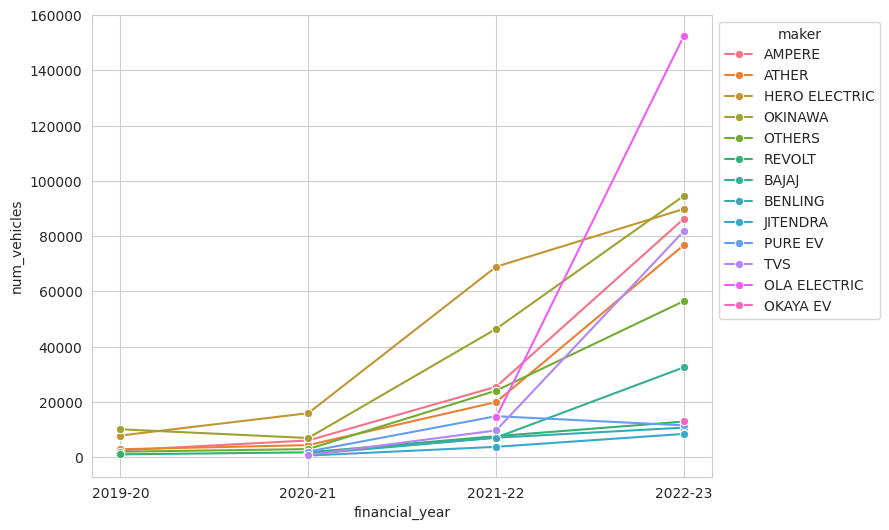

In [18]:
plt.figure(figsize=(8,6))
ax=sns.lineplot(x="financial_year",y="num_vehicles",data=df_w2_vech_grp,marker="o",hue="maker")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

- OLA experienced lot of sales in the year 2022-2023

- It is the clear analysis of Vehicles produced by Industry upto 2023

### EV Market Segmentation

In [19]:
df_bikewale=pd.read_csv("/content/ev2_bikewale.csv")
df_bikewale.head()

,review,Used it for,Owned for,Ridden for,rating,Visual Appeal,Reliability,Performance,Service Experience,Extra Features,Comfort,Maintenance cost,Value for Money,Model Name
0,We all checked the bike's capacity to be 150 k...,Daily Commute,Never owned,NaN,1,3.0,4.0,NaN,NaN,NaN,4.0,NaN,1.0,TVS iQube
1,Performance is very poor on this bike. The cha...,Everything,> 1 yr,< 5000 kms,1,3.0,1.0,NaN,1.0,NaN,3.0,NaN,3.0,TVS iQube
2,I purchased this in April 2022 and the sales s...,Daily Commute,< 3 months,< 5000 kms,3,4.0,4.0,NaN,2.0,NaN,5.0,NaN,2.0,TVS iQube
3,If any issues come in scooty parts not availab...,Daily Commute,6 months-1 yr,5000-10000 kms,1,1.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,TVS iQube
4,Don't buy this vehicle unless you have a near ...,Daily Commute,6 months-1 yr,< 5000 kms,1,3.0,4.0,NaN,1.0,NaN,3.0,NaN,2.0,TVS iQube


In [20]:
df_model_spec=pd.read_csv("ev_model_spec.csv")
df_model_spec.head()

,Model Name,Price,Riding Range (km),Top Speed (kmph),Weight (kg),Battery Charging Time (hrs),Rated Power (W)
0,Ampere Magnus EX,104758,121,53,90,7,1200
1,Ampere Magnus Pro,66053,45,25,94,10,250
2,Ampere REO,61993,45,25,88,10,250
3,Ampere Zeal,96544,120,53,80,7,1200
4,Ather 450X,135489,111,90,108,8,3000


In [21]:
df_customer_review=pd.merge(left=df_bikewale,right=df_model_spec,on="Model Name")
df_customer_review.head()

,review,Used it for,Owned for,Ridden for,rating,Visual Appeal,Reliability,Performance,Service Experience,Extra Features,Comfort,Maintenance cost,Value for Money,Model Name,Price,Riding Range (km),Top Speed (kmph),Weight (kg),Battery Charging Time (hrs),Rated Power (W)
0,We all checked the bike's capacity to be 150 k...,Daily Commute,Never owned,NaN,1,3.0,4.0,NaN,NaN,NaN,4.0,NaN,1.0,TVS iQube,137890,100,78,117,5,3000
1,Performance is very poor on this bike. The cha...,Everything,> 1 yr,< 5000 kms,1,3.0,1.0,NaN,1.0,NaN,3.0,NaN,3.0,TVS iQube,137890,100,78,117,5,3000
2,I purchased this in April 2022 and the sales s...,Daily Commute,< 3 months,< 5000 kms,3,4.0,4.0,NaN,2.0,NaN,5.0,NaN,2.0,TVS iQube,137890,100,78,117,5,3000
3,If any issues come in scooty parts not availab...,Daily Commute,6 months-1 yr,5000-10000 kms,1,1.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,TVS iQube,137890,100,78,117,5,3000
4,Don't buy this vehicle unless you have a near ...,Daily Commute,6 months-1 yr,< 5000 kms,1,3.0,4.0,NaN,1.0,NaN,3.0,NaN,2.0,TVS iQube,137890,100,78,117,5,3000


In [22]:
df_customer_review.shape

(844, 20)

In [23]:
df_customer_review.isna().mean().sort_values(ascending=False)*100

,0
Maintenance cost,78.672986
Extra Features,78.080569
Performance,59.123223
Value for Money,53.791469
Comfort,37.203791
Ridden for,20.853081
Service Experience,16.706161
Reliability,15.165877
Visual Appeal,12.440758
review,5.568720


In [24]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [25]:
sentiments = SentimentIntensityAnalyzer()
sentiments_list = []

for review in df_customer_review['review']:
    if pd.isna(review):
        sentiments_list.append('neutral')
        continue
    scores = sentiments.polarity_scores(review)

    positive_score = scores['pos']
    negative_score = scores['neg']

    if positive_score > negative_score:
      sentiments_list.append("positive")

    elif positive_score < negative_score:
        sentiments_list.append("negative")
    else:
        sentiments_list.append("neutral")

df_customer_review['sentiment'] = sentiments_list


In [26]:
df_customer_review.sentiment.value_counts()

,count
sentiment,
positive,527
negative,264
neutral,53


- selecting those features which indicating consumer beahaviour after using the EV vehicles

1. Maintenance cost
2. Extra Features
3. Performance
4. Value for Money
5. Comfort
6. Ridden for
7. Service Experience
8. Reliability
9. Visual Appeal
10. review
11. Used it for
12. rating
13. Owned for



In [27]:
cols=["Maintenance cost","Extra Features",
      "Performance","Value for Money",
      "Comfort","Ridden for",
      "Service Experience","Reliability",
      "Visual Appeal","review","Used it for",
      "rating","Owned for"]

data_for_segment=df_customer_review[cols].copy()

In [28]:
data_for_segment.isna().sum()

,0
Maintenance cost,664
Extra Features,659
Performance,499
Value for Money,454
Comfort,314
Ridden for,176
Service Experience,141
Reliability,128
Visual Appeal,105
review,47


In [29]:
data_for_segment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 844 entries, 0 to 843
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Maintenance cost    180 non-null    float64
 1   Extra Features      185 non-null    float64
 2   Performance         345 non-null    float64
 3   Value for Money     390 non-null    float64
 4   Comfort             530 non-null    float64
 5   Ridden for          668 non-null    object 
 6   Service Experience  703 non-null    float64
 7   Reliability         716 non-null    float64
 8   Visual Appeal       739 non-null    float64
 9   review              797 non-null    object 
 10  Used it for         844 non-null    object 
 11  rating              844 non-null    int64  
 12  Owned for           844 non-null    object 
dtypes: float64(8), int64(1), object(4)
memory usage: 85.8+ KB


In [30]:
num_cols=data_for_segment.select_dtypes("float64").columns

In [31]:
segment_data=data_for_segment[num_cols].fillna(0)

In [32]:
segment_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 844 entries, 0 to 843
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Maintenance cost    844 non-null    float64
 1   Extra Features      844 non-null    float64
 2   Performance         844 non-null    float64
 3   Value for Money     844 non-null    float64
 4   Comfort             844 non-null    float64
 5   Service Experience  844 non-null    float64
 6   Reliability         844 non-null    float64
 7   Visual Appeal       844 non-null    float64
dtypes: float64(8)
memory usage: 52.9 KB


In [33]:
segment_data.head()

,Maintenance cost,Extra Features,Performance,Value for Money,Comfort,Service Experience,Reliability,Visual Appeal
0,0.0,0.0,0.0,1.0,4.0,0.0,4.0,3.0
1,0.0,0.0,0.0,3.0,3.0,1.0,1.0,3.0
2,0.0,0.0,0.0,2.0,5.0,2.0,4.0,4.0
3,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0
4,0.0,0.0,0.0,2.0,3.0,1.0,4.0,3.0


In [34]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
data_segment_scaled=scaler.fit_transform(segment_data)

In [35]:
from sklearn.decomposition import PCA
pca=PCA(random_state=1234)
pca.fit(data_segment_scaled)

segment_pca=pca.transform(data_segment_scaled)

In [36]:
[f"PC{i}" for i in range(4)]

['PC0', 'PC1', 'PC2', 'PC3']

In [37]:
df_segment=pd.DataFrame(segment_pca,columns=[f"PC{i+1}" for i in range(segment_data.shape[1])])

In [38]:
df_segment.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,0.291227,-1.038055,0.354864,-0.623469,-1.102720,-0.169287,-0.438012,0.957827
1,0.710801,-1.394405,-0.360466,-0.621671,0.320899,-0.086053,-0.426279,-0.149917
2,-0.849149,-1.189765,0.167683,-0.410898,-0.409054,-0.191904,-0.329993,0.830738
3,1.967022,-0.878935,-0.100197,0.330003,-0.075822,0.069599,0.013068,0.011328
4,0.078940,-1.017161,-0.079210,-0.324132,-0.961554,0.005517,-0.107260,0.427972


In [39]:
pca_summary = pd.DataFrame({'Standard Deviation':df_segment.std(),
                           'Proportion of Variance': pca.explained_variance_ratio_,
                           'Cumultive Proportion': pca.explained_variance_ratio_.cumsum()})
pca_summary

,Standard Deviation,Proportion of Variance,Cumultive Proportion
PC1,1.845017,0.425007,0.425007
PC2,1.736646,0.376546,0.801553
PC3,0.903486,0.101915,0.903468
PC4,0.517750,0.033468,0.936936
PC5,0.405239,0.020503,0.957439
PC6,0.379558,0.017987,0.975426
PC7,0.337883,0.014254,0.989680
PC8,0.287510,0.010320,1.000000


In [40]:
 factor_load=pd.DataFrame(pca.components_, columns = segment_data.columns, index = df_segment.columns).T

In [41]:
factor_load

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
Maintenance cost,0.005912,0.513208,-0.386495,-0.054822,0.020302,-0.762039,-0.003360,0.055435
Extra Features,-0.024373,0.519633,-0.364578,-0.023208,0.116821,0.559390,-0.456829,0.246323
Performance,-0.128721,0.459145,0.574833,-0.005549,-0.019902,-0.025704,-0.288468,-0.598232
Value for Money,-0.309572,-0.351548,-0.563840,-0.107598,-0.046688,0.009572,-0.260855,-0.617065
Comfort,-0.418255,-0.304266,0.249807,-0.020111,0.172621,-0.296656,-0.623271,0.404238
Service Experience,-0.486499,0.100691,-0.054176,0.653781,0.470391,0.052432,0.311210,-0.044129
Reliability,-0.494758,0.124910,-0.002776,0.152447,-0.819319,0.060484,0.117211,0.166384
Visual Appeal,-0.480170,0.117814,0.063320,-0.730598,0.247014,0.105903,0.375474,0.067539


<ipython-input-42-b5a218a8db63>:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  factor_load['PC1'][i] * 3.5,
<ipython-input-42-b5a218a8db63>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  factor_load['PC2'][i] * 3.5,
<ipython-input-42-b5a218a8db63>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(factor_load['PC1'][i] * 3.5,
<ipython-input-42-b5a218a8db63>:12: FutureWarning: Series.__getitem__ treating keys as positions

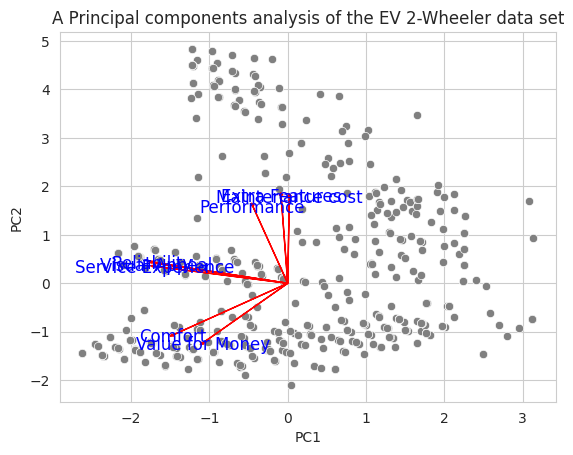

In [42]:
indices=factor_load.index
sns.scatterplot(data=df_segment,x="PC1",y="PC2",color='gray')
for i in range(len(factor_load['PC1'])):
  plt.arrow(0, 0,
            factor_load['PC1'][i] * 3.5,
            factor_load['PC2'][i] * 3.5,
            head_width=0.05,
            head_length=0.05,
            fc='red',
            ec='red')
  plt.text(factor_load['PC1'][i] * 3.5,
           factor_load['PC2'][i]* 3.5,
           indices[i],
           fontsize=12,
           ha='center',
           color = 'blue',
           va = 'center_baseline')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('A Principal components analysis of the EV 2-Wheeler data set')
plt.show()

In [43]:
from sklearn.cluster import KMeans

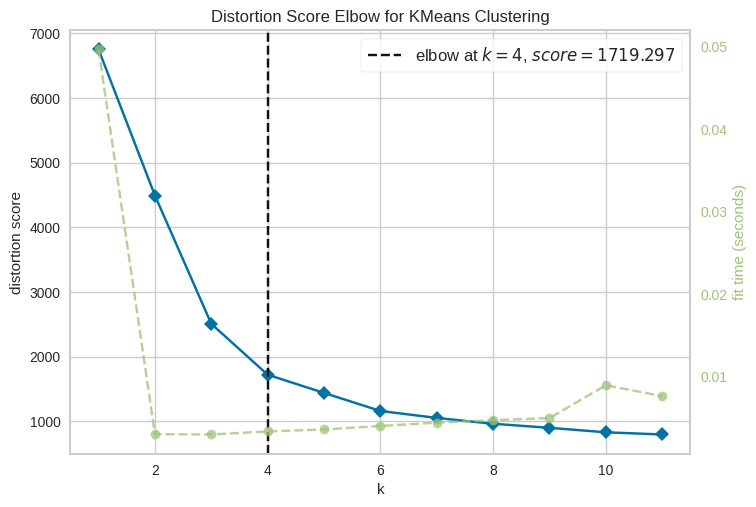

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [44]:
from yellowbrick.cluster import KElbowVisualizer
model=KMeans(n_init='auto')
visualizer=KElbowVisualizer(estimator=model,k=(1,12)).fit(df_segment)
visualizer.show()

- From the above elbow plot,we have to select the k=4 for optimal clusters in the data

<BarContainer object of 7 artists>

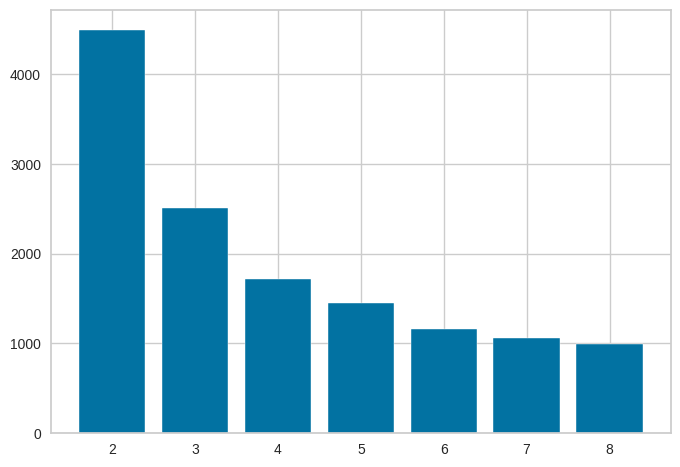

In [45]:
cluster_models = [KMeans(n_clusters = k, random_state = 42,n_init='auto').fit(df_segment) for k in range(2, 9)]
scores=[elem.inertia_ for elem in cluster_models]
plt.bar([i for i in range(2,9)],scores)

In [46]:
final_cluster=cluster_models[2]

In [47]:
data_segment_pca=df_segment.copy()
data_segment_pca["labels"]=final_cluster.labels_

In [48]:
data_segment_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,labels
0,0.291227,-1.038055,0.354864,-0.623469,-1.102720,-0.169287,-0.438012,0.957827,1
1,0.710801,-1.394405,-0.360466,-0.621671,0.320899,-0.086053,-0.426279,-0.149917,1
2,-0.849149,-1.189765,0.167683,-0.410898,-0.409054,-0.191904,-0.329993,0.830738,0
3,1.967022,-0.878935,-0.100197,0.330003,-0.075822,0.069599,0.013068,0.011328,1
4,0.078940,-1.017161,-0.079210,-0.324132,-0.961554,0.005517,-0.107260,0.427972,0


In [49]:
data_segment=segment_data.copy()
data_segment["labels"]=final_cluster.labels_

In [50]:
data_segment.head()

,Maintenance cost,Extra Features,Performance,Value for Money,Comfort,Service Experience,Reliability,Visual Appeal,labels
0,0.0,0.0,0.0,1.0,4.0,0.0,4.0,3.0,1
1,0.0,0.0,0.0,3.0,3.0,1.0,1.0,3.0,1
2,0.0,0.0,0.0,2.0,5.0,2.0,4.0,4.0,0
3,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1
4,0.0,0.0,0.0,2.0,3.0,1.0,4.0,3.0,0


### Data Profiling

In [51]:
data_profile=data_segment.copy()
data_mean_cluster_wise=data_profile.groupby('labels').mean().T

In [52]:
data_mean_cluster_wise

labels,0,1,2,3
Maintenance cost,0.000000,0.471299,4.174312,0.000000
Extra Features,0.000000,0.344411,3.917431,0.015748
Performance,0.000000,0.561934,4.348624,4.385827
Value for Money,4.115523,0.540785,0.000000,0.000000
Comfort,4.259928,0.716012,0.000000,4.133858
Service Experience,3.870036,0.752266,3.935780,3.629921
Reliability,4.036101,0.854985,4.247706,4.007874
Visual Appeal,4.339350,1.601208,4.467890,4.519685


In [53]:
data_mean_cluster_wise.index

Index(['Maintenance cost', 'Extra Features', 'Performance', 'Value for Money',
       'Comfort', 'Service Experience', 'Reliability', 'Visual Appeal'],
      dtype='object')

In [54]:
data_mean_cluster_wise

labels,0,1,2,3
Maintenance cost,0.000000,0.471299,4.174312,0.000000
Extra Features,0.000000,0.344411,3.917431,0.015748
Performance,0.000000,0.561934,4.348624,4.385827
Value for Money,4.115523,0.540785,0.000000,0.000000
Comfort,4.259928,0.716012,0.000000,4.133858
Service Experience,3.870036,0.752266,3.935780,3.629921
Reliability,4.036101,0.854985,4.247706,4.007874
Visual Appeal,4.339350,1.601208,4.467890,4.519685


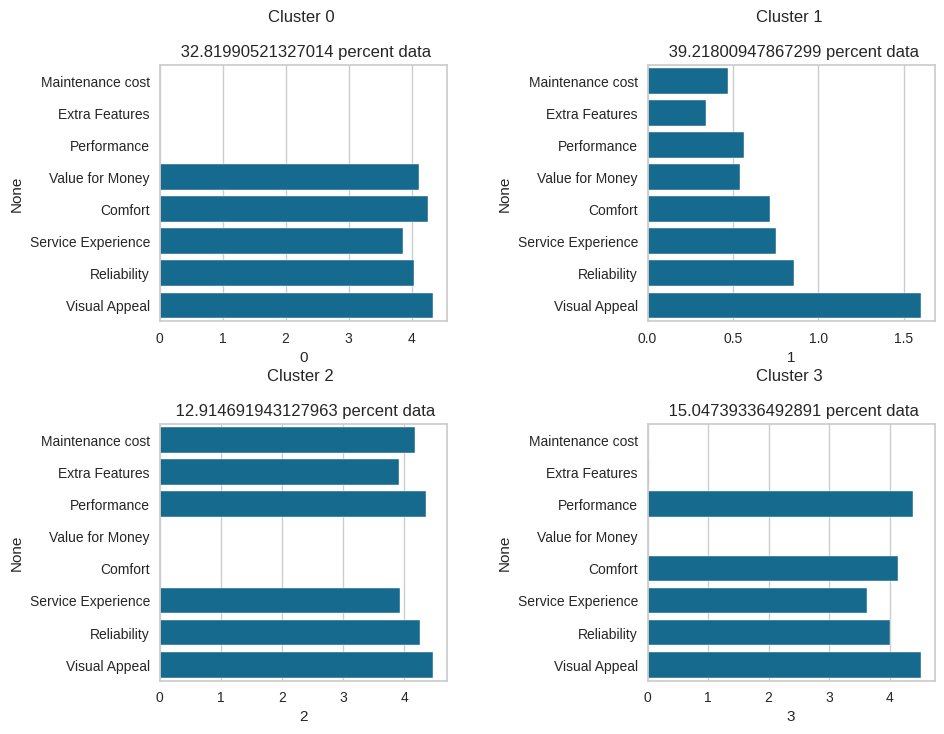

In [55]:
fig,axes=plt.subplots(2,2,figsize=(10,8))
sns.barplot(y=data_mean_cluster_wise.index, x=data_mean_cluster_wise.iloc[:, 0],ax=axes[0][0])
sns.barplot(y=data_mean_cluster_wise.index, x=data_mean_cluster_wise.iloc[:, 1],ax=axes[0][1])
sns.barplot(y=data_mean_cluster_wise.index, x=data_mean_cluster_wise.iloc[:, 2],ax=axes[1][0])
sns.barplot(y=data_mean_cluster_wise.index, x=data_mean_cluster_wise.iloc[:, 3],ax=axes[1][1])
plt.subplots_adjust(wspace=0.7,hspace=0.4)
percet_0=(data_profile.groupby("labels")["Visual Appeal"].count()[0]/len(data_profile))*100
percet_1=(data_profile.groupby("labels")["Visual Appeal"].count()[1]/len(data_profile))*100
percet_2=(data_profile.groupby("labels")["Visual Appeal"].count()[2]/len(data_profile))*100
percet_3=(data_profile.groupby("labels")["Visual Appeal"].count()[3]/len(data_profile))*100
axes[0][0].set_title(f"Cluster 0 \n\n {percet_0} percent data")
axes[0][1].set_title(f"Cluster 1 \n\n {percet_1} percent data")
axes[1][0].set_title(f"Cluster 2 \n\n {percet_2} percent data")
axes[1][1].set_title(f"Cluster 3 \n\n {percet_3} percent data")
plt.show()

- Segment 0 Customers shows very much satisfaction in the features of Value for Money,Comfort,Serive Experience,Reliability,Visual Appeal with largest population

- Segment 1 Custometrs largest population but shows dissatisfaction almost among all the features of EV market

- segment 2 Customers shows dissatisfaction in the context of Value for money,Comfort but alot satisfaction in rest of the features

- segment 3 Customers shows dissatisfaction in the features of value for money,Extra Features, Maintainane Cost

- So the organization should

### Describing Segments

In [56]:
df_customer_review.head()

,review,Used it for,Owned for,Ridden for,rating,Visual Appeal,Reliability,Performance,Service Experience,Extra Features,...,Maintenance cost,Value for Money,Model Name,Price,Riding Range (km),Top Speed (kmph),Weight (kg),Battery Charging Time (hrs),Rated Power (W),sentiment
0,We all checked the bike's capacity to be 150 k...,Daily Commute,Never owned,NaN,1,3.0,4.0,NaN,NaN,NaN,...,NaN,1.0,TVS iQube,137890,100,78,117,5,3000,negative
1,Performance is very poor on this bike. The cha...,Everything,> 1 yr,< 5000 kms,1,3.0,1.0,NaN,1.0,NaN,...,NaN,3.0,TVS iQube,137890,100,78,117,5,3000,negative
2,I purchased this in April 2022 and the sales s...,Daily Commute,< 3 months,< 5000 kms,3,4.0,4.0,NaN,2.0,NaN,...,NaN,2.0,TVS iQube,137890,100,78,117,5,3000,positive
3,If any issues come in scooty parts not availab...,Daily Commute,6 months-1 yr,5000-10000 kms,1,1.0,1.0,NaN,1.0,NaN,...,NaN,1.0,TVS iQube,137890,100,78,117,5,3000,negative
4,Don't buy this vehicle unless you have a near ...,Daily Commute,6 months-1 yr,< 5000 kms,1,3.0,4.0,NaN,1.0,NaN,...,NaN,2.0,TVS iQube,137890,100,78,117,5,3000,negative


In [57]:
data=df_customer_review.copy()
data["labels"]= final_cluster.labels_

In [58]:
data.columns

Index(['review', 'Used it for', 'Owned for', 'Ridden for', 'rating',
       'Visual Appeal', 'Reliability', 'Performance', 'Service Experience',
       'Extra Features', 'Comfort', 'Maintenance cost', 'Value for Money',
       'Model Name', 'Price', 'Riding Range (km)', 'Top Speed (kmph)',
       'Weight (kg)', 'Battery Charging Time (hrs)', 'Rated Power (W)',
       'sentiment', 'labels'],
      dtype='object')

In [59]:
sentiment_cluster=pd.crosstab(index=data["labels"],columns=data["sentiment"])

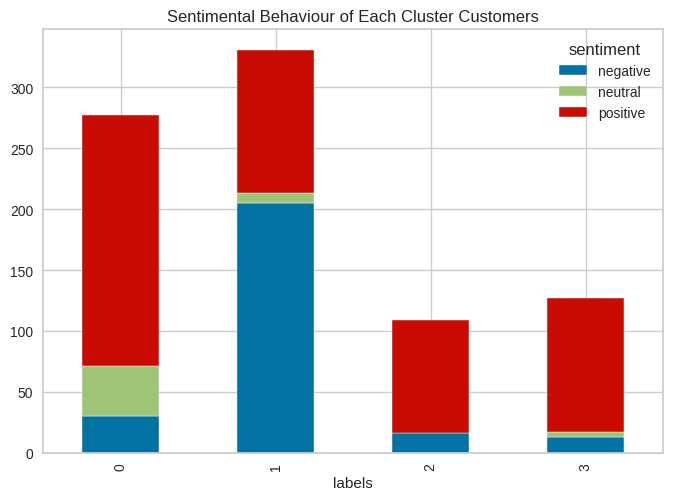

In [60]:
sentiment_cluster.plot(kind="bar",stacked=True)
plt.title("Sentimental Behaviour of Each Cluster Customers")
plt.show()

- segment 1 exhibiting different trend among all other segments
- segment 0,2,3 shows more postive sentiments
- only segment 1 stood uniquely and showed more dissatisfaction compared to all other segments

In [61]:
used_for=pd.crosstab(index=data["labels"],columns=data["Used it for"])
used_for

Used it for,Daily Commute,Everything,Leisure Rides,Occasional Commute,Tours
labels,,,,,
0,194,55,7,19,2
1,245,47,7,27,5
2,86,19,2,1,1
3,75,39,4,9,0


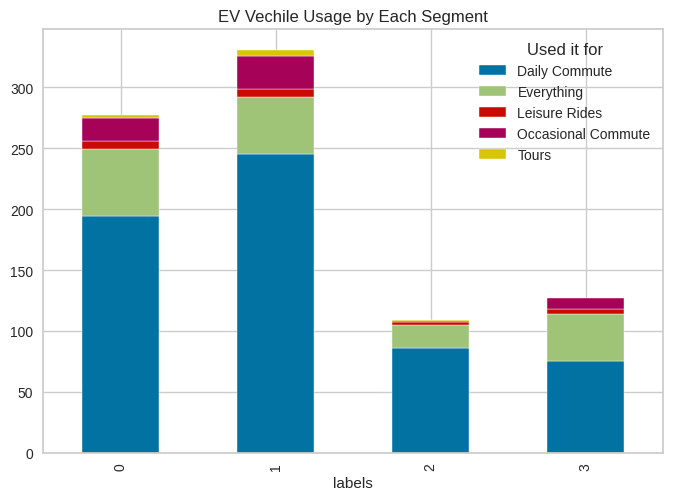

In [62]:
used_for.plot(kind="bar",stacked=True)
plt.title("EV Vechile Usage by Each Segment")
plt.show()

- All segments using EV vechiles for Daily and Everything purposes
- Least time used for Occasional purpose

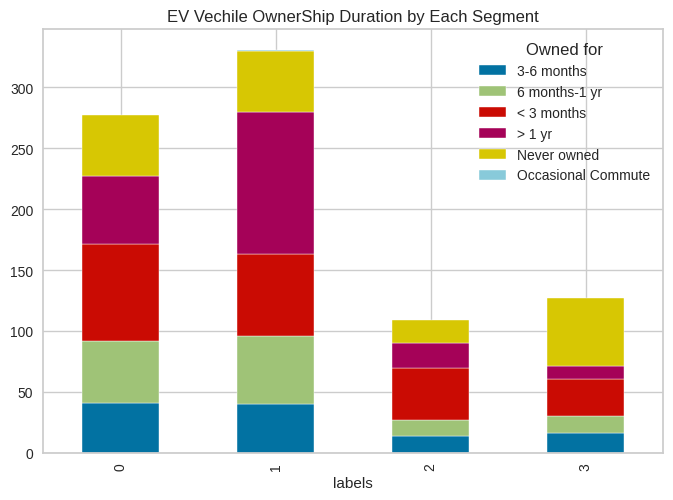

In [65]:
owned_for=pd.crosstab(index=data["labels"],columns=data["Owned for"])
owned_for.plot(kind="bar",stacked=True)
plt.title("EV Vechile OwnerShip Duration by Each Segment")
plt.show()

- Segment 1 people has experience more than 1 yr while other people of all clusters has less than 1 yr
- segment 3 has less ownership experience
- segment 0 has moderate ownership experience

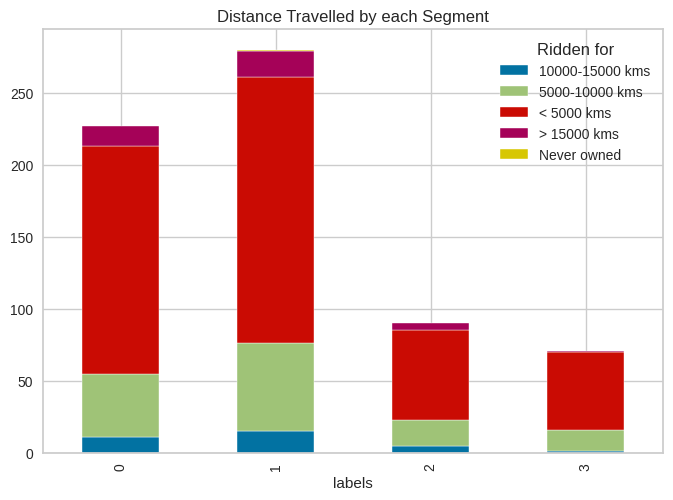

In [66]:
ridden_for=pd.crosstab(index=data["labels"],columns=data["Ridden for"])
ridden_for.plot(kind="bar",stacked=True)
plt.title("Distance Travelled by each Segment")
plt.show()

- All segments are using EV vehicles and travelled distance below 5000KMS
- Few segments travelled 10000-150000 KMS

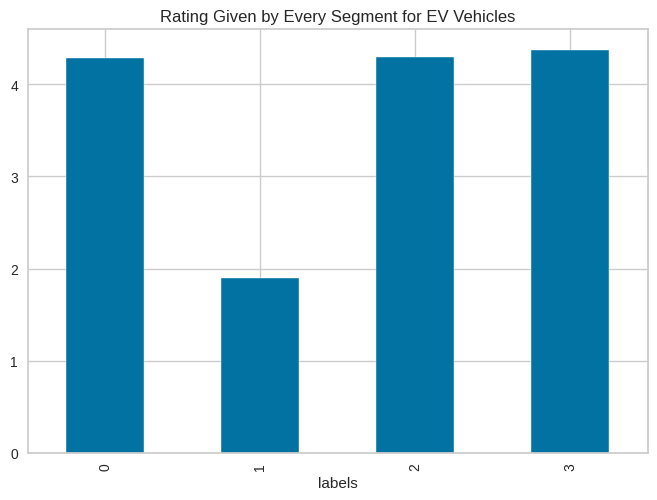

In [67]:
data.groupby("labels")["rating"].mean().plot(kind="bar")
plt.title("Rating Given by Every Segment for EV Vehicles")
plt.show()

- From the above graph Segment 1 shows dissatisfaction

In [68]:
data.columns

Index(['review', 'Used it for', 'Owned for', 'Ridden for', 'rating',
       'Visual Appeal', 'Reliability', 'Performance', 'Service Experience',
       'Extra Features', 'Comfort', 'Maintenance cost', 'Value for Money',
       'Model Name', 'Price', 'Riding Range (km)', 'Top Speed (kmph)',
       'Weight (kg)', 'Battery Charging Time (hrs)', 'Rated Power (W)',
       'sentiment', 'labels'],
      dtype='object')

In [69]:
vehicles_cols=['Price',
               'Riding Range (km)',
               'Top Speed (kmph)',
               'Weight (kg)',
               'Battery Charging Time (hrs)',
               'Rated Power (W)']

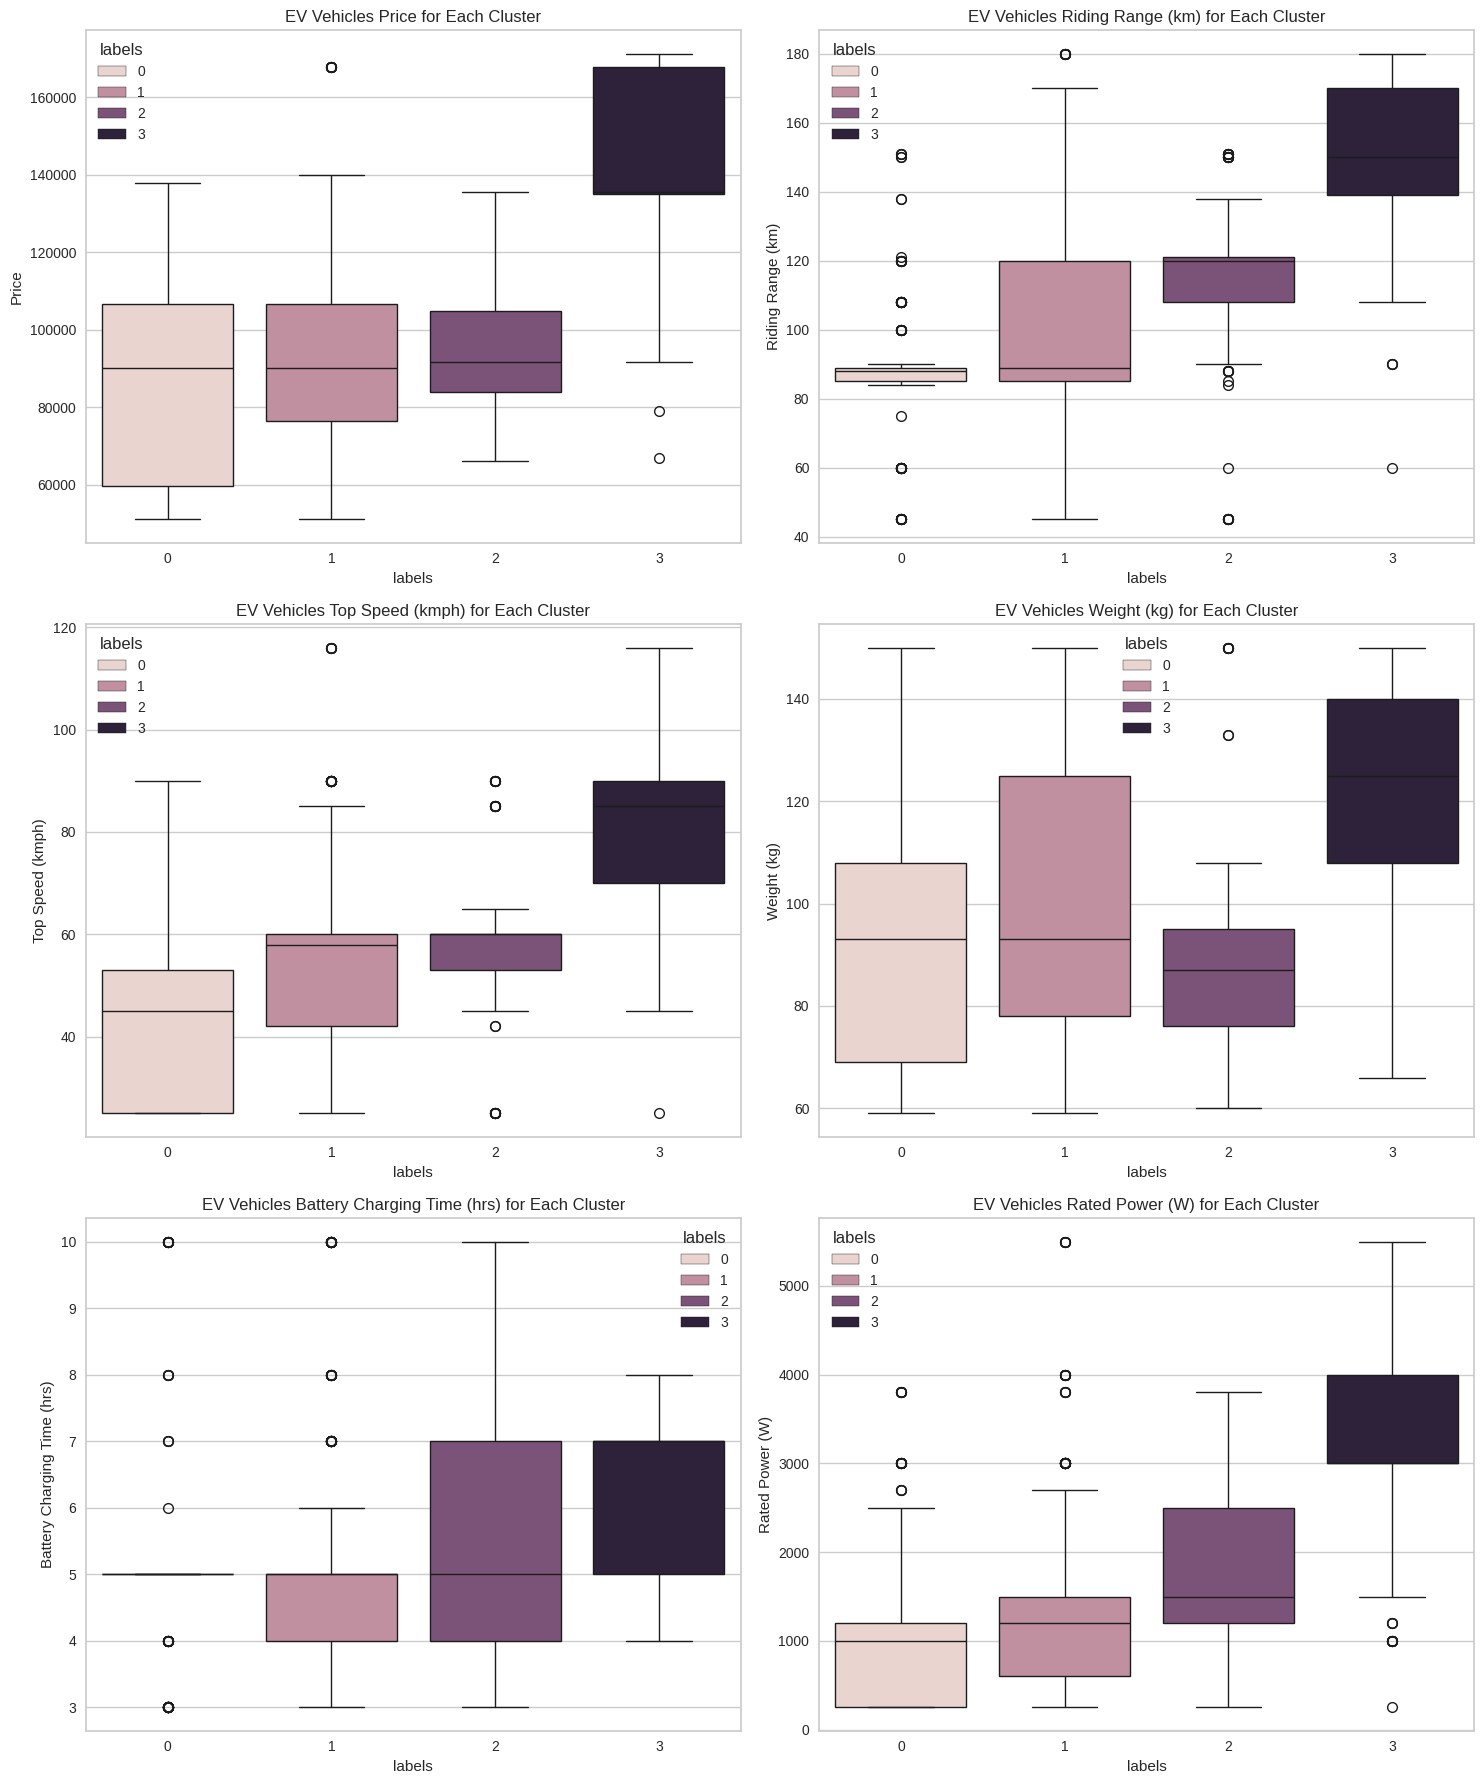

In [73]:
fig,axes=plt.subplots(3,2,figsize=(15,3*6))
for i in range(3):
  for j in range(2):
    sns.boxplot(x="labels",y=vehicles_cols[i*2+j],data=data,hue="labels",ax=axes[i][j])
    axes[i][j].set_title(f"EV Vehicles {vehicles_cols[i*2+j]} for Each Cluster")
plt.tight_layout()
plt.savefig("ev_vehicles_clusters.png")
plt.show()

-from the above plots

- segment 3 is somewhat premium segment where all the vehicles of this segment has price ranges above 160000 with riding range above 140 km

- segment 2 is moderate ranges of prices and riding ranges

- segment 1 is also same as segment 1 moderate but high populated but shows dissatisfaction among EV vehicles

- segment 1 and segment 2 are in ranges of affordable for more people

### Selection of Target Segment

The strategic target segments for the electric vehicle market are identified as
Segment 1 (39% of consumers) and
Segment 2 (33% of consumers).
Segment 1's diverse preferences and dissatisfaction points present an opportunity for improving customer satisfaction and loyalty by directly addressing their specific demands.
Segment 2 values visual appeal, reliability, service experience, and comfort, offering a chance to customize electric vehicles to meet these expectations and emphasize value for money.
The strategy involves addressing dissatisfaction points in Segment 1 and enhancing positive elements in Segment 2,
aligning electric vehicles with the distinct expectations of each segment to ensure competitive advantage and sustained market growth.

### Optimal Target Market

Most Optimal Market Segments
After thorough analysis and evaluation, Segment 1, constituting 39% of consumers, has been identified as the optimal market segment for electric two-wheeler vehicles. With a significant customer base and a balanced blend of technical specifications and price range, this segment offers substantial market potential. The recommended technical specifications for Segment 1 include a price range of ₹70,688 to ₹1,29,063, riding range of 89 to 180 km, top speed of 58 to 116 kmph, weight of 76 to 120 kg, battery charging time of 3 to 5 hours, and rated power of 1200 to 5500 W. This targeted approach ensures alignment with the diverse needs and preferences of the market, laying the foundation for a successful and sustainable venture into the electric vehicle market.